In [16]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [17]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

mpl.rcParams.update({'font.size': 22})

In [18]:
dirnames = glob('*/')
if 'tests/' in dirnames:
    dirnames.remove('tests/')
dirnames = sorted(dirnames, key=str.lower)
dirnames

['ABmodel/',
 'case_no_relaxation/',
 'DTmodel/',
 'ETmodel/',
 'LRmodel/',
 'NNmodel/',
 'RFmodel/',
 'RFmodel_original/',
 'XGB2model/',
 'XGBRFmodel/']

In [19]:
dfiter = []
dfall = pd.DataFrame()
for dirname in dirnames:
    dfiter.append(pd.read_csv(dirname + "non_linear_iterations.csv").iloc[:,:-1])
    dfiter[-1].columns = dfiter[-1].columns.str.strip()
    dfall = pd.concat([dfall, dfiter[-1]], axis=0)
dfall.reset_index(drop=True, inplace=True)

In [20]:
dfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7061 entries, 0 to 7060
Data columns (total 3 columns):
time_step                      7061 non-null int64
outer_nonlinear_iteration      7061 non-null int64
Inner_non_linear_iterations    7061 non-null int64
dtypes: int64(3)
memory usage: 165.6 KB


In [21]:
for df in dfiter:
    print(df.iloc[-1:,:])

     time_step  outer_nonlinear_iteration  Inner_non_linear_iterations
635        150                          4                            1
      time_step  outer_nonlinear_iteration  Inner_non_linear_iterations
1325        150                          5                            1
     time_step  outer_nonlinear_iteration  Inner_non_linear_iterations
716        150                          4                            1
     time_step  outer_nonlinear_iteration  Inner_non_linear_iterations
621        150                          4                            1
     time_step  outer_nonlinear_iteration  Inner_non_linear_iterations
613        150                          4                            1
     time_step  outer_nonlinear_iteration  Inner_non_linear_iterations
618        150                          4                            1
     time_step  outer_nonlinear_iteration  Inner_non_linear_iterations
629        150                          4                            1
    

In [22]:
eqiter = {}
pgain = {} 
for i, df in enumerate(dfiter):
    eqiter[dirnames[i][:-1]] = round(df['Inner_non_linear_iterations'].count() + df['Inner_non_linear_iterations'].sum()/3, ndigits=2)
    #pgain[dirnames[i][:-1]] = round((eqiter[dirnames[0][:-1]] - eqiter[dirnames[i][:-1]])*100/eqiter[dirnames[0][:-1]], ndigits=2)
for i, df in enumerate(dfiter):    
    pgain[dirnames[i][:-1]] = round((eqiter[dirnames[-3][:-1]] - eqiter[dirnames[i][:-1]])*100/eqiter[dirnames[-3][:-1]], ndigits=2)

In [23]:
for key, value in eqiter.items():
    print(f'{key:60}{value}')

ABmodel                                                     896.67
case_no_relaxation                                          1929.67
DTmodel                                                     1013.0
ETmodel                                                     867.33
LRmodel                                                     1039.0
NNmodel                                                     876.67
RFmodel                                                     879.67
RFmodel_original                                            879.67
XGB2model                                                   880.67
XGBRFmodel                                                  884.67


In [24]:
for key, value in pgain.items():
    print(f'{key:60}{value} %')

ABmodel                                                     -1.93 %
case_no_relaxation                                          -119.36 %
DTmodel                                                     -15.16 %
ETmodel                                                     1.4 %
LRmodel                                                     -18.11 %
NNmodel                                                     0.34 %
RFmodel                                                     0.0 %
RFmodel_original                                            0.0 %
XGB2model                                                   -0.11 %
XGBRFmodel                                                  -0.57 %


## Compare two cases from the index of dirnames

In [25]:
index1 = -1
index2 = -3
print('index1 =', dirnames[index1])
print('index2 =', dirnames[index2])

index1 = XGBRFmodel/
index2 = RFmodel_original/


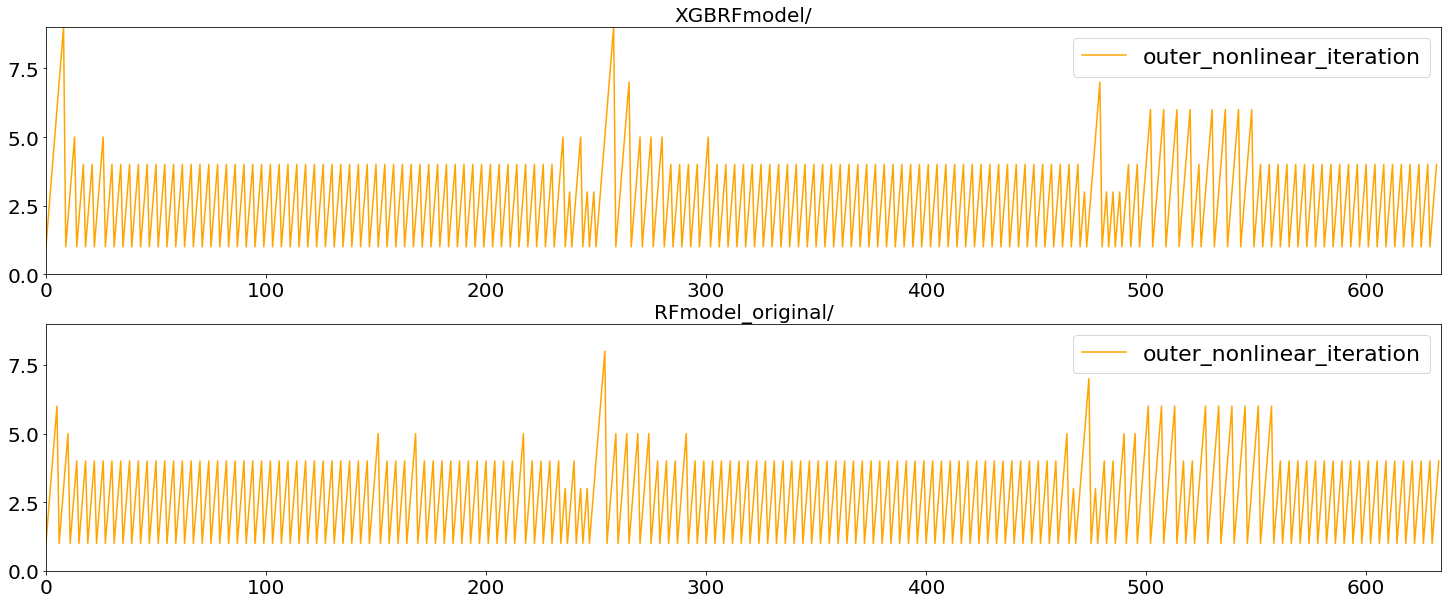

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1)
dfiter[index1].iloc[:,1:2].plot(ax=ax1, style='orange', figsize=(25, 10), fontsize=20, title = dirnames[index1],
                                xlim=[0,max(dfiter[index1].iloc[:,1].count(), dfiter[index2].iloc[:,1].count())],
                                ylim=[0,max(dfiter[index1].iloc[:,1].max(), dfiter[index2].iloc[:,1].max())])
dfiter[index2].iloc[:,1:2].plot(ax=ax2, style='orange', figsize=(25, 10), fontsize=20, title = dirnames[index2],
                                xlim=[0,max(dfiter[index1].iloc[:,1].count(), dfiter[index2].iloc[:,1].count())],
                                ylim=[0,max(dfiter[index1].iloc[:,1].max(), dfiter[index2].iloc[:,1].max())])
ax1.title.set_size(20)
ax2.title.set_size(20)

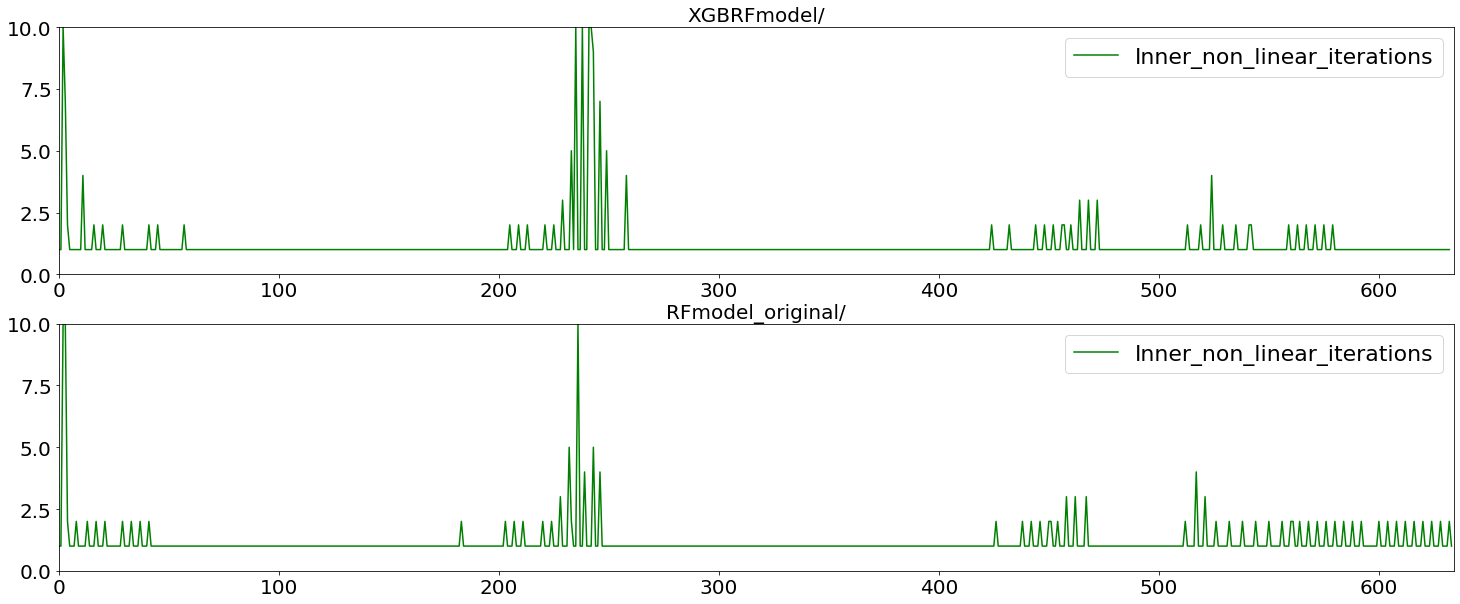

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 1)
dfiter[index1].iloc[:,2:].plot(ax=ax1, style='g', figsize=(25, 10), fontsize=20, title = dirnames[index1],
                               xlim=[0,max(dfiter[index1].iloc[:,2].count(), dfiter[index2].iloc[:,2].count())],
                               ylim=[0,max(dfiter[index1].iloc[:,2].max(), dfiter[index2].iloc[:,2].max())])
dfiter[index2].iloc[:,2:].plot(ax=ax2, style='g', figsize=(25, 10), fontsize=20, title = dirnames[index2],
                               xlim=[0,max(dfiter[index1].iloc[:,2].count(), dfiter[index2].iloc[:,2].count())],
                               ylim=[0,max(dfiter[index1].iloc[:,2].max(), dfiter[index2].iloc[:,2].max())])
ax1.title.set_size(20)
ax2.title.set_size(20)

## Plots

In [28]:
onli = []
inli = []
eqnli = []
for i in range(len(dirnames)):
    onli.append(dfiter[i].groupby(['time_step'])['outer_nonlinear_iteration'].count() )
    inli.append(dfiter[i].groupby(['time_step'])['Inner_non_linear_iterations'].sum() )
    eqnli.append(onli[-1] + inli[-1]/3)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


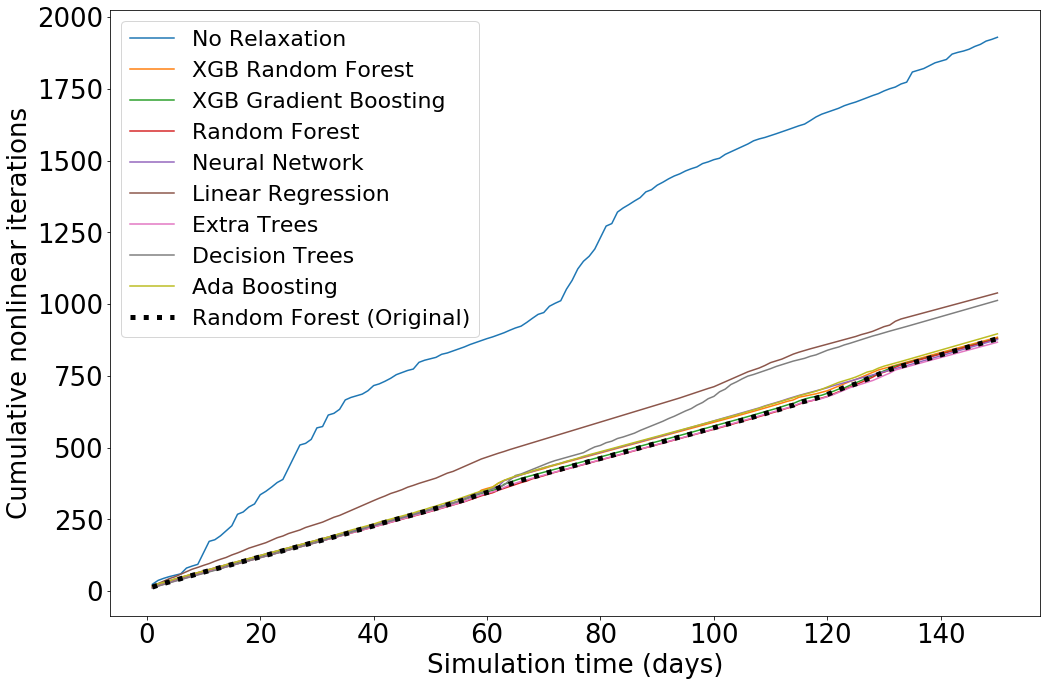

In [29]:
mpl.rcParams.update({'font.size': 22})
mpl.rc('xtick', labelsize=26) 
mpl.rc('ytick', labelsize=26) 
mpl.rc('axes', labelsize=26)

plotlist = [1, 9, 8, 6, 5, 4, 3, 2, 0]
markers= ['-o', '-v', '-d', '-*', '-<', '->', '-s', '-1', '-2', '-3', '-4']
#markers= ['-o', '-', '-', '-', '-', '-', '-', '-', '-', '-*']

plt.figure(figsize=(15,10))
for j, i in enumerate(plotlist):
    plt.plot(eqnli[i].index, eqnli[i].cumsum())#, markers[j])#marker=markers[j], markevery=2, markersize = 8) #, fillstyle='none'
plt.plot(eqnli[7].index, eqnli[7].cumsum(), 'k:', linewidth=5)#

plt.xlabel('Simulation time (days)')
plt.ylabel('Cumulative nonlinear iterations')
#plt.legend(np.array(dirnames)[plotlist])
plt.legend(['No Relaxation','XGB Random Forest','XGB Gradient Boosting','Random Forest',
            'Neural Network','Linear Regression','Extra Trees','Decision Trees','Ada Boosting','Random Forest (Original)'])
plt.tight_layout()
plt.savefig('model_case2.eps')

In [30]:
dirnames

['ABmodel/',
 'case_no_relaxation/',
 'DTmodel/',
 'ETmodel/',
 'LRmodel/',
 'NNmodel/',
 'RFmodel/',
 'RFmodel_original/',
 'XGB2model/',
 'XGBRFmodel/']